In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,mean_squared_error

# reading dataset

In [2]:
data = pd.read_csv('USA_Housing.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# describing tha data

In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# counting no: of row & cols

In [6]:
raw_count= data.shape[0]
column_count=data.shape[1]
print('Number of raws: {} \n Number of columns: {}'.format(raw_count,column_count))


Number of raws: 5000 
 Number of columns: 7


# checking the presentation of null values

In [7]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
data_copy = data.copy()

In [10]:
data_copy.drop('Address',axis=1,inplace = True)

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\si

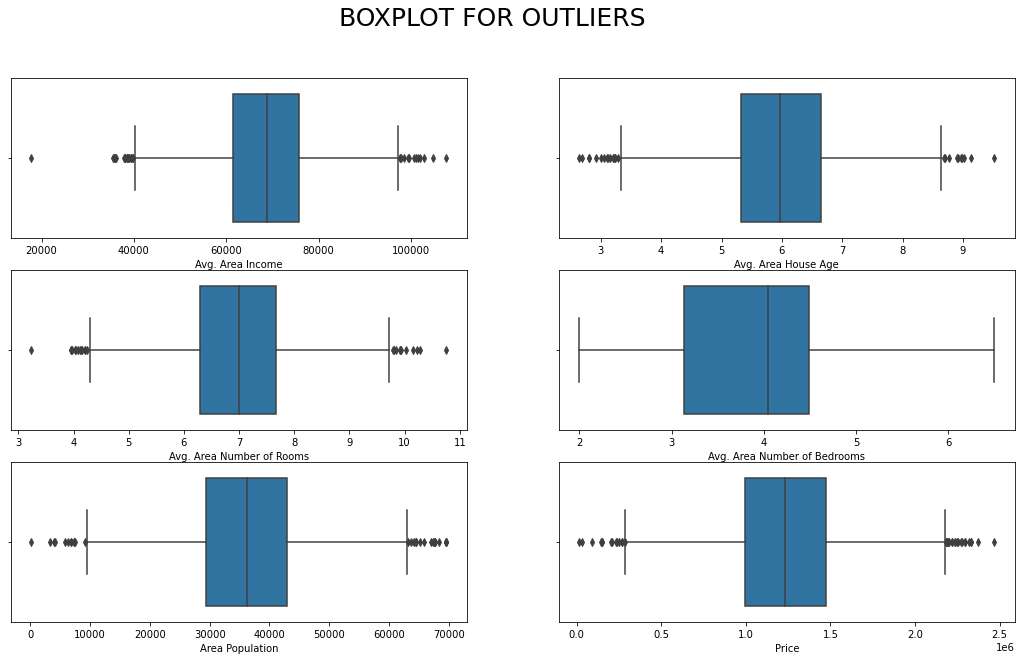

In [11]:
plt.figure(figsize=(18,10))
plt.subplot(3,2,1)
sns.boxplot(data_copy['Avg. Area Income'])
plt.subplot(3,2,2)
sns.boxplot(data_copy['Avg. Area House Age'])
plt.subplot(3,2,3)
sns.boxplot(data_copy['Avg. Area Number of Rooms'])
plt.subplot(3,2,4)
sns.boxplot(data_copy['Avg. Area Number of Bedrooms'])
plt.subplot(3,2,5)
sns.boxplot(data_copy['Area Population'])
plt.subplot(3,2,6)
sns.boxplot(data_copy['Price'])
plt.suptitle('BOXPLOT FOR OUTLIERS ',fontsize= 25)
plt.show()

# data preprocessing

In [12]:
for i in data_copy:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    data[i].where(data[i] >=l_lim,l_lim, inplace=True)
    data[i].where(data[i] <=u_lim,u_lim, inplace=True)

In [13]:
data_cpy_outliers_removed= data.copy()
data_cpy_outliers_removed.drop('Address',axis=1,inplace= True)

C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishn\anaconda3\lib\si

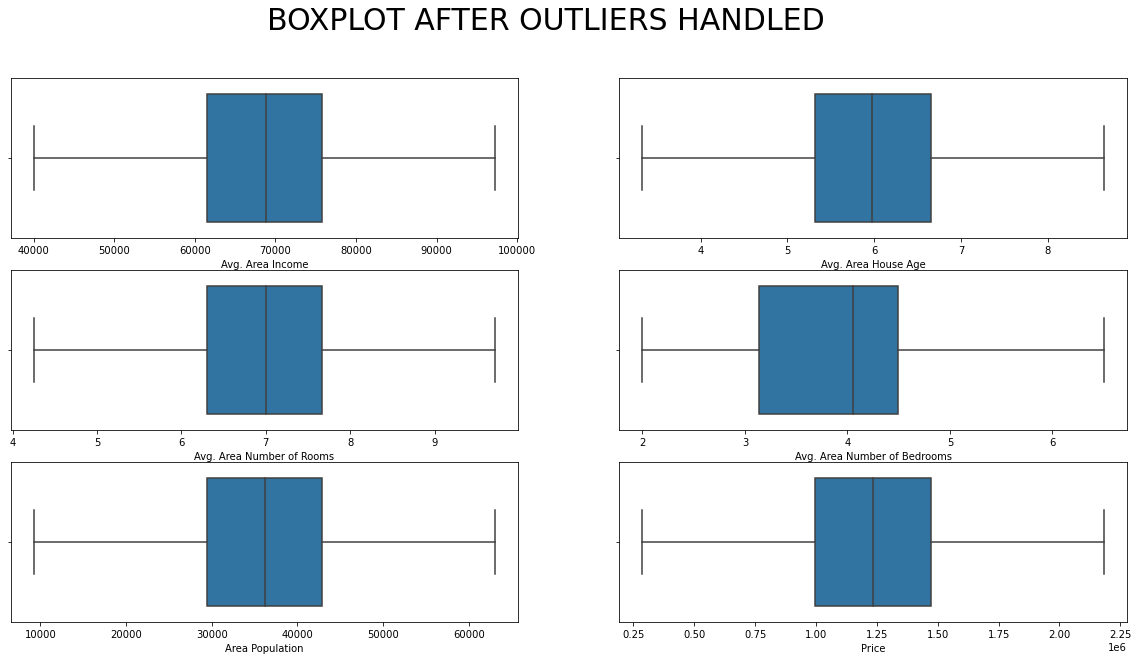

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.boxplot(data_cpy_outliers_removed['Avg. Area Income'])
plt.subplot(3,2,2)
sns.boxplot(data_cpy_outliers_removed['Avg. Area House Age'])
plt.subplot(3,2,3)
sns.boxplot(data_cpy_outliers_removed['Avg. Area Number of Rooms'])
plt.subplot(3,2,4)
sns.boxplot(data_cpy_outliers_removed['Avg. Area Number of Bedrooms'])
plt.subplot(3,2,5)
sns.boxplot(data_cpy_outliers_removed['Area Population'])
plt.subplot(3,2,6)
sns.boxplot(data_cpy_outliers_removed['Price'])
plt.suptitle('BOXPLOT AFTER OUTLIERS HANDLED ',fontsize= 30)
plt.show()

# dropping the address column

In [15]:
data.drop('Address',axis=1,inplace= True)

In [16]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.636250,5.977490,6.987624,3.981330,36159.070769,1.232028e+06
std,10592.080045,0.986995,1.001847,1.234137,9862.221143,3.512598e+05
min,40026.397972,3.329495,4.249318,2.000000,9217.885601,2.871275e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,97237.503083,8.643597,9.715803,6.500000,63047.333870,2.181660e+06


In [17]:
X= data.drop('Price',axis=1)
y=data['Price']
y=y.values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.20, random_state= 10)


# scalar

In [19]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [20]:
X_train= pd.DataFrame(X_train_scaled,columns= ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'])

In [21]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.060274,0.605508,-1.482641,-1.376906,0.197385
1,-0.721863,-1.886140,0.525668,0.960953,1.321667
2,0.714786,0.794443,0.324303,0.831522,0.657600
3,0.251219,-1.693290,-0.362441,0.305705,-0.203328
4,-0.133684,-1.032412,0.641922,1.114653,-1.388536


# creating  model

In [23]:
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred= regressor.predict(X_test)

In [25]:
print('Mean Squared Error= {}'.format(mean_squared_error(y_test,y_pred)))

Mean Squared Error= 4.5049969527557535e+20
